In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(f"Parent directory: {parent_dir}")

Parent directory: /u/weim/lob


In [2]:
lots_list = [20,60]
n_samples = 10000
train_iter = 200

In [3]:
# testing stuff here 
# import numpy as np
# name = '/u/weim/lob/rewards/flow_60_seed_0_num_iterations_2_bsize_280_log_normal.npz'
# output = np.load(name)['rewards']
# print(output)

In [4]:
# Should update this to include: Dirichlet, Normal+Softmax 
# Note: need more training iterations like 400 (or 500 iterations)
# For 200 iterations, in the noise setting, the rl agent is not better than the noise agent 
# note dirichlet agents also seeems to work well 
lots_list = [20,60]
n_samples = 10000
train_iter = 400

folder_path = f"{parent_dir}/rewards"
data = {}
# agent_list = ['sl_agent', 'linear_sl_agent', 'log_normal', 'dirichlet']
agent_list = ['sl_agent', 'linear_sl_agent', 'log_normal', 'dirichlet']
for env in ['noise', 'flow', 'strategic']:
    data[env] = {}
    for lots in lots_list:
        data[env][lots] = {}
        for agent in agent_list:            
            try: 
                if agent in ['log_normal', 'dirichlet']:               
                    name =  f'{folder_path}/{env}_{lots}_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_{train_iter}_bsize_12800_{agent}.npz'
                    # /u/weim/lob/rewards/noise_20_episodes_10000_eval_seed_100_log_normal.npz
                else:
                    # might need to updating the naming here
                    name = f'{folder_path}/{env}_{lots}_episodes_{10000}_eval_seed_100_{agent}.npz'
                print(f'loading from {name}')
                data[env][lots][agent] = np.load(name)['rewards']
            except:
                print(f"path doesnt exist: {name}")
                data[env][lots][agent] = 'no data aviailable'

loading from /u/weim/lob/rewards/noise_20_episodes_10000_eval_seed_100_sl_agent.npz
loading from /u/weim/lob/rewards/noise_20_episodes_10000_eval_seed_100_linear_sl_agent.npz
loading from /u/weim/lob/rewards/noise_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal.npz
loading from /u/weim/lob/rewards/noise_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet.npz
loading from /u/weim/lob/rewards/noise_60_episodes_10000_eval_seed_100_sl_agent.npz
loading from /u/weim/lob/rewards/noise_60_episodes_10000_eval_seed_100_linear_sl_agent.npz
loading from /u/weim/lob/rewards/noise_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal.npz
loading from /u/weim/lob/rewards/noise_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet.npz
loading from /u/weim/lob/rewards/flow_20_episodes_10000_eval_seed_100_sl_agent.npz
loading from /u/weim/lob/rewards/flow_20_episodes_100

In [16]:
print(data)

{'noise': {20: {'sl_agent': array([ 1. , -0.2,  1. , ..., -0.6,  1. ,  1. ]), 'linear_sl_agent': array([-0.1 , -1.15, -1.3 , ..., -0.15, -0.9 ,  0.3 ]), 'log_normal': array([0.95, 2.  , 1.  , ..., 1.2 , 1.  , 0.15]), 'dirichlet': array([ 0.95,  1.  ,  0.75, ..., -1.6 ,  0.55,  0.85])}, 60: {'sl_agent': array([-1.21666667, -0.68333333, -0.98333333, ..., -0.1       ,
       -3.        , -0.28333333]), 'linear_sl_agent': array([-1.11666667, -1.43333333, -2.25      , ..., -0.71666667,
       -1.13333333, -3.08333333]), 'log_normal': array([-0.53333333, -0.88333333,  0.6       , ...,  0.        ,
       -1.8       , -0.73333333]), 'dirichlet': array([-0.68333333,  0.01666667, -0.18333333, ...,  0.28333333,
       -0.88333333, -0.03333333])}}, 'flow': {20: {'sl_agent': array([ 1.  , -2.4 , -1.4 , ...,  1.  , -2.85, -2.55]), 'linear_sl_agent': array([ 0.5 ,  0.15,  1.1 , ..., -0.5 ,  1.7 ,  0.5 ]), 'log_normal': array([ 1.9 ,  2.  ,  0.9 , ..., -0.05, -0.25,  0.  ]), 'dirichlet': array([ 0.85

In [27]:
folder_path = f"{parent_dir}/latex_tables"
list_of_dfs = []
# n_lots = [20, 60]
# print(filler)
for env in ['noise', 'flow', 'strategic']:
    # filler = pd.DataFrame(np.nan*np.ones((1,6)), columns=['E[SL]', 'Std[SL]', 'E[TWAP]', 'Std[TWAP]', 'E[RL]', 'Std[RL]'], index=[f'{env}'])
    filler = pd.DataFrame(np.nan*np.ones((1,8)), columns=['E[SL]', 'Std[SL]', 'E[TWAP]', 'Std[TWAP]', 'E[LN]', 'Std[LN]', 'E[DR]', 'Std[DR]'], index=[f'{env}'])
    list_of_dfs.append(filler)
    # print(f'{env}: ')
    data_for_df = {}
    # name_dict = {'sl_agent': 'SL', 'linear_sl_agent': 'TWAP', 'actor_critic': 'RL'}
    name_dict = {'sl_agent': 'SL', 'linear_sl_agent': 'TWAP', 'log_normal': 'LN', 'dirichlet': 'DR'}
    agent_names = ['sl_agent', 'linear_sl_agent', 'log_normal', 'dirichlet']
    for agent in agent_names:
        name = name_dict[agent]
        data_for_df[f'E[{name}]'] = []
        data_for_df[f'Std[{name}]'] = []
        for lots in lots_list:
            try:
                data_for_df[f'Std[{name}]'] += [np.std(data[env][lots][agent])]
                data_for_df[f'E[{name}]'] += [np.mean(data[env][lots][agent])]                
            except:
                print(f"no data available for {env}, {lots}, {agent}")
                data_for_df[f'Std[{name}]'] += [np.nan]
                data_for_df[f'E[{name}]'] += [np.nan]
    df = pd.DataFrame.from_dict(data_for_df).round(2)    
    df.index.name = 'Lots'
    index_name = [f'{env}_{l}' for l in lots_list]
    df.index = index_name
    df = df.round(2)
    list_of_dfs.append(df)

complete_df = pd.concat(list_of_dfs, axis=0)
print(complete_df)
latex_table = complete_df.to_latex(float_format="%.2f")
with open(f"{folder_path}/results_table_latest_with_dirichlet.tex", "w") as f:
    f.write(latex_table)


              E[SL]  Std[SL]  E[TWAP]  Std[TWAP]  E[LN]  Std[LN]  E[DR]  \
noise           NaN      NaN      NaN        NaN    NaN      NaN    NaN   
noise_20       0.52     1.19    -0.06       0.94   0.64     0.88   0.58   
noise_60      -1.09     1.34    -1.40       0.98  -0.81     0.93  -0.74   
flow            NaN      NaN      NaN        NaN    NaN      NaN    NaN   
flow_20        0.10     1.43     0.48       0.68   0.79     0.67   0.73   
flow_60       -3.36     0.99    -0.96       0.95  -0.24     0.66  -0.41   
strategic       NaN      NaN      NaN        NaN    NaN      NaN    NaN   
strategic_20  -1.64     2.95    -0.36       3.03   1.11     2.23   0.86   
strategic_60  -2.51     3.67    -1.45       3.46   0.11     2.42  -0.02   

              Std[DR]  
noise             NaN  
noise_20         0.90  
noise_60         0.92  
flow              NaN  
flow_20          0.67  
flow_60          0.63  
strategic         NaN  
strategic_20     1.92  
strategic_60     1.90  


In [21]:
complete_df.iloc[:, 4:]

,E[LN],Std[LN],E[DR],Std[DR]
noise,NaN,NaN,NaN,NaN
noise_20,0.64,0.88,0.58,0.90
noise_60,-0.81,0.93,-0.74,0.92
flow,NaN,NaN,NaN,NaN
flow_20,0.79,0.67,0.73,0.67
flow_60,-0.24,0.66,-0.41,0.63
strategic,NaN,NaN,NaN,NaN
strategic_20,1.11,2.23,0.86,1.92
strategic_60,0.11,2.42,-0.02,1.90


In [22]:
import numpy as np
from scipy import stats

alpha = 1e-1
for env in ['flow', 'strategic']:
    for lots in lots_list:
        print('####')
        print(f'{env} {lots_list}: ')
        try:
            group1 = data[env][lots]['linear_sl_agent']
            group2 = data[env][lots]['actor_critic']
            t_statistic, p_value = stats.ttest_ind(group1, group2)
            print(f"linear_sl vs rl: t-statistic: {t_statistic}, p-value: {p_value}")
            if p_value < alpha:
                print("The means are statistically different.")
            else:
                print("The means are not statistically different.")
        except:
            print(f"no data available for {env}, {lots_list}, linear_sl vs rl")
        # print()


####
flow [20, 60]: 
no data available for flow, [20, 60], linear_sl vs rl
####
flow [20, 60]: 
no data available for flow, [20, 60], linear_sl vs rl
####
strategic [20, 60]: 
no data available for strategic, [20, 60], linear_sl vs rl
####
strategic [20, 60]: 
no data available for strategic, [20, 60], linear_sl vs rl


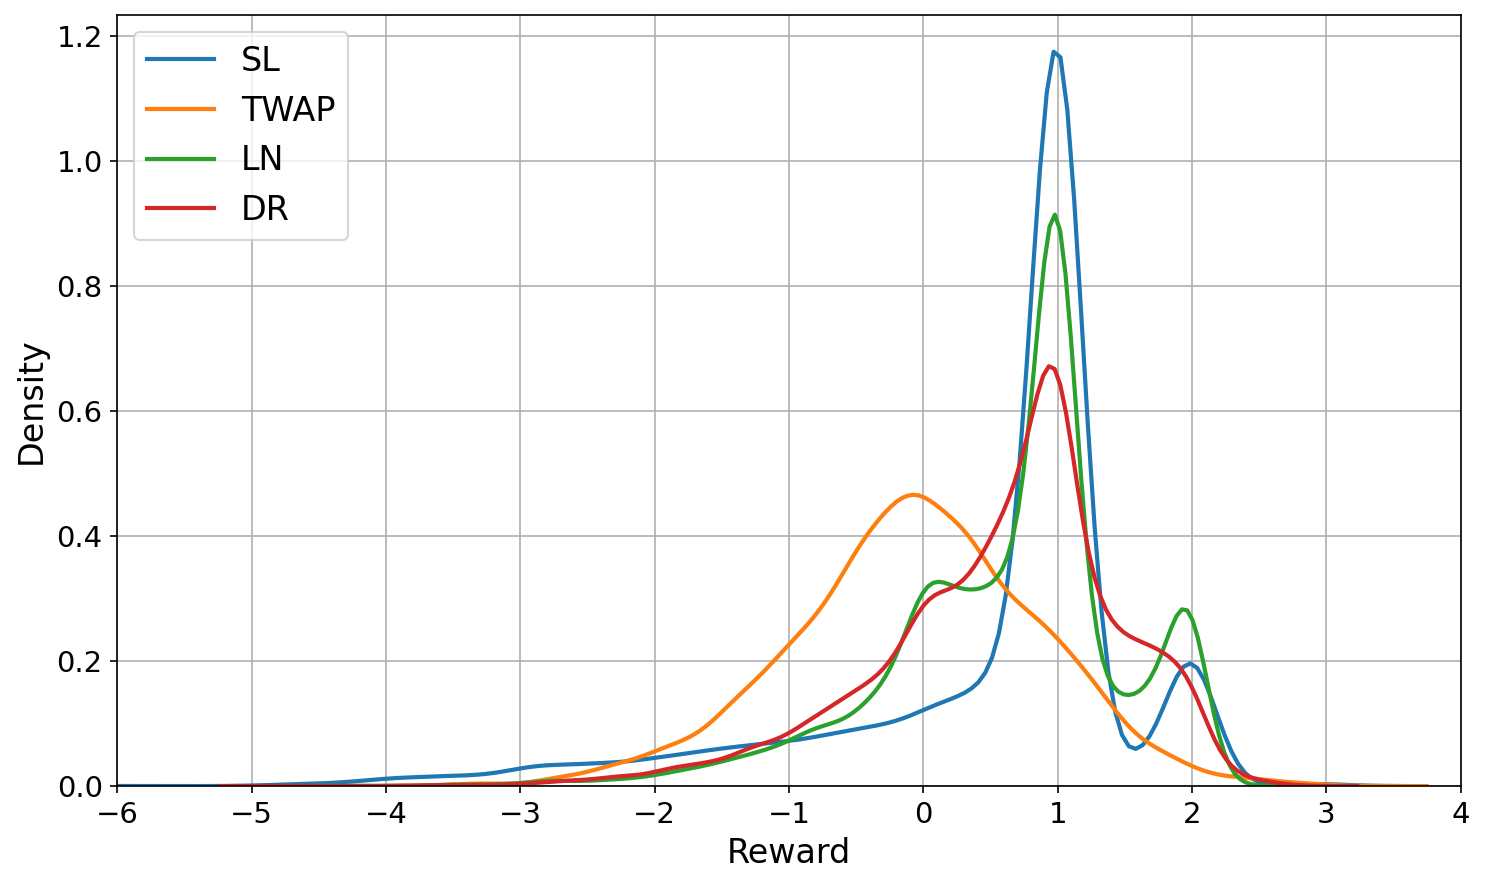

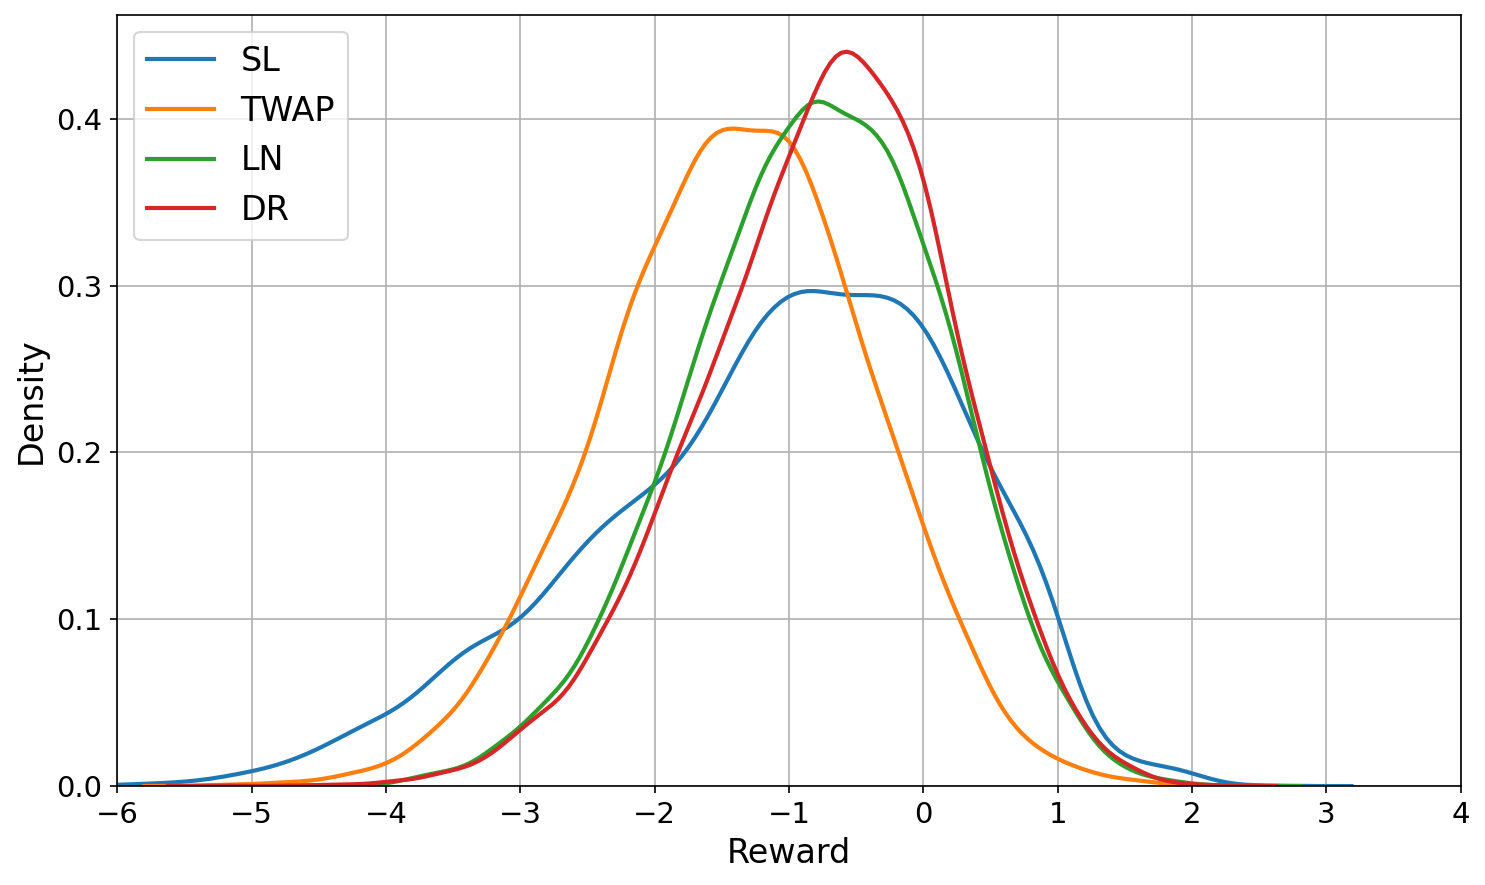

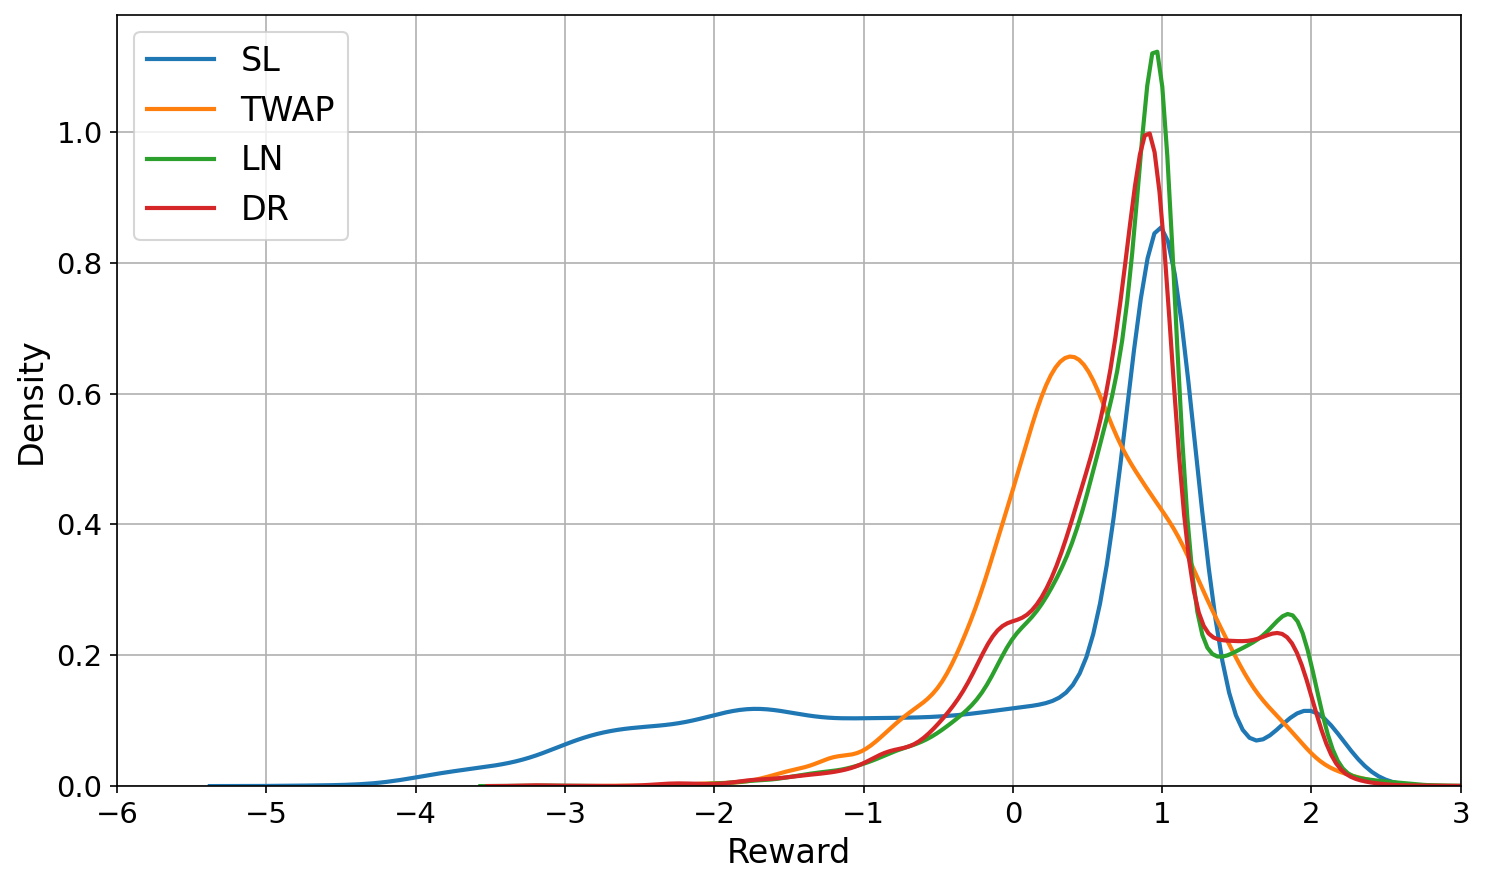

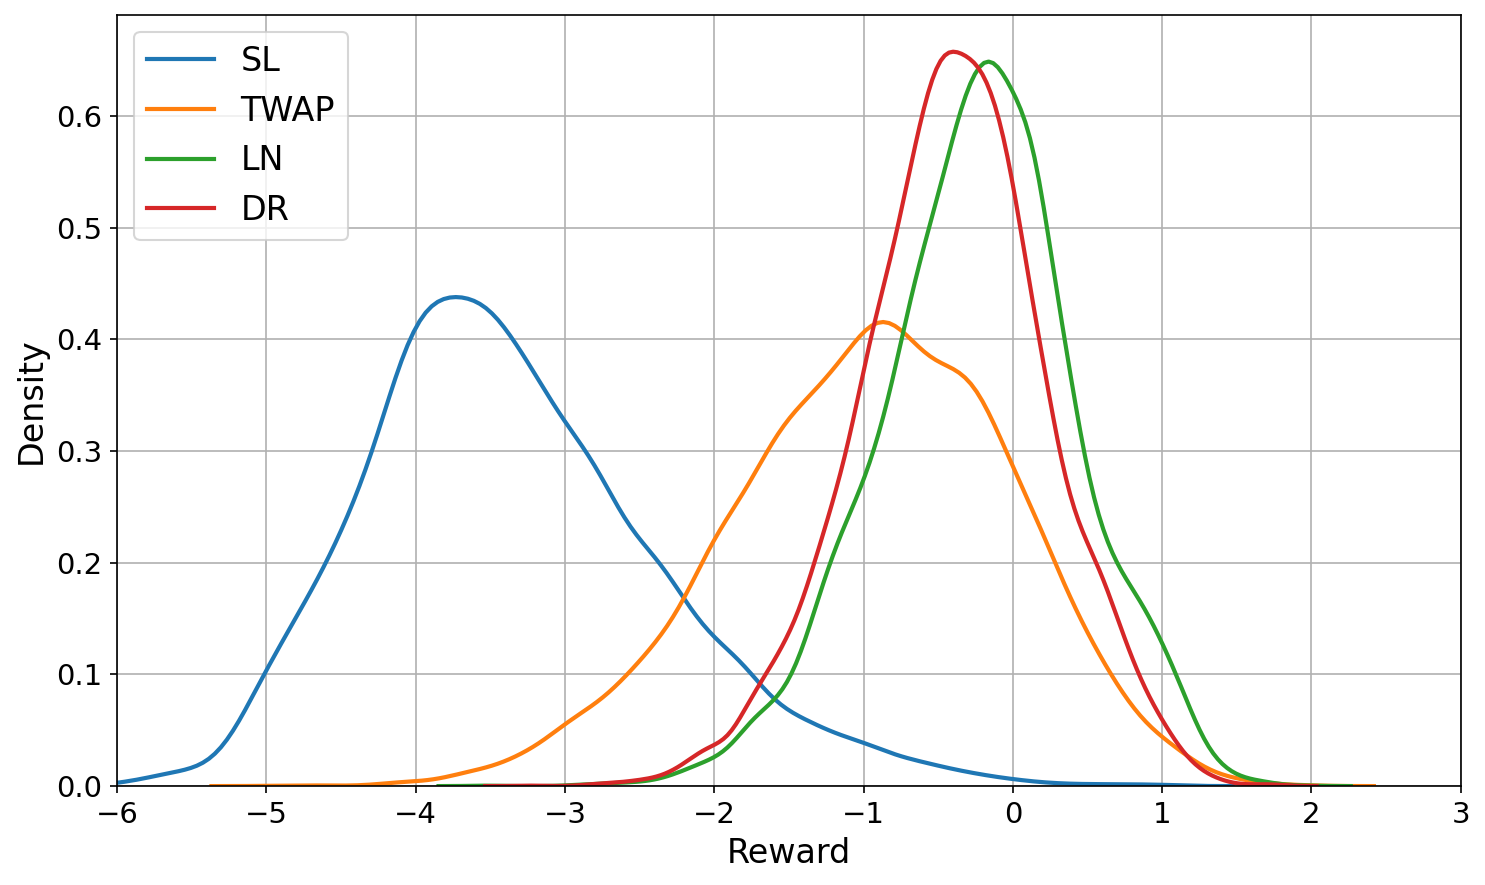

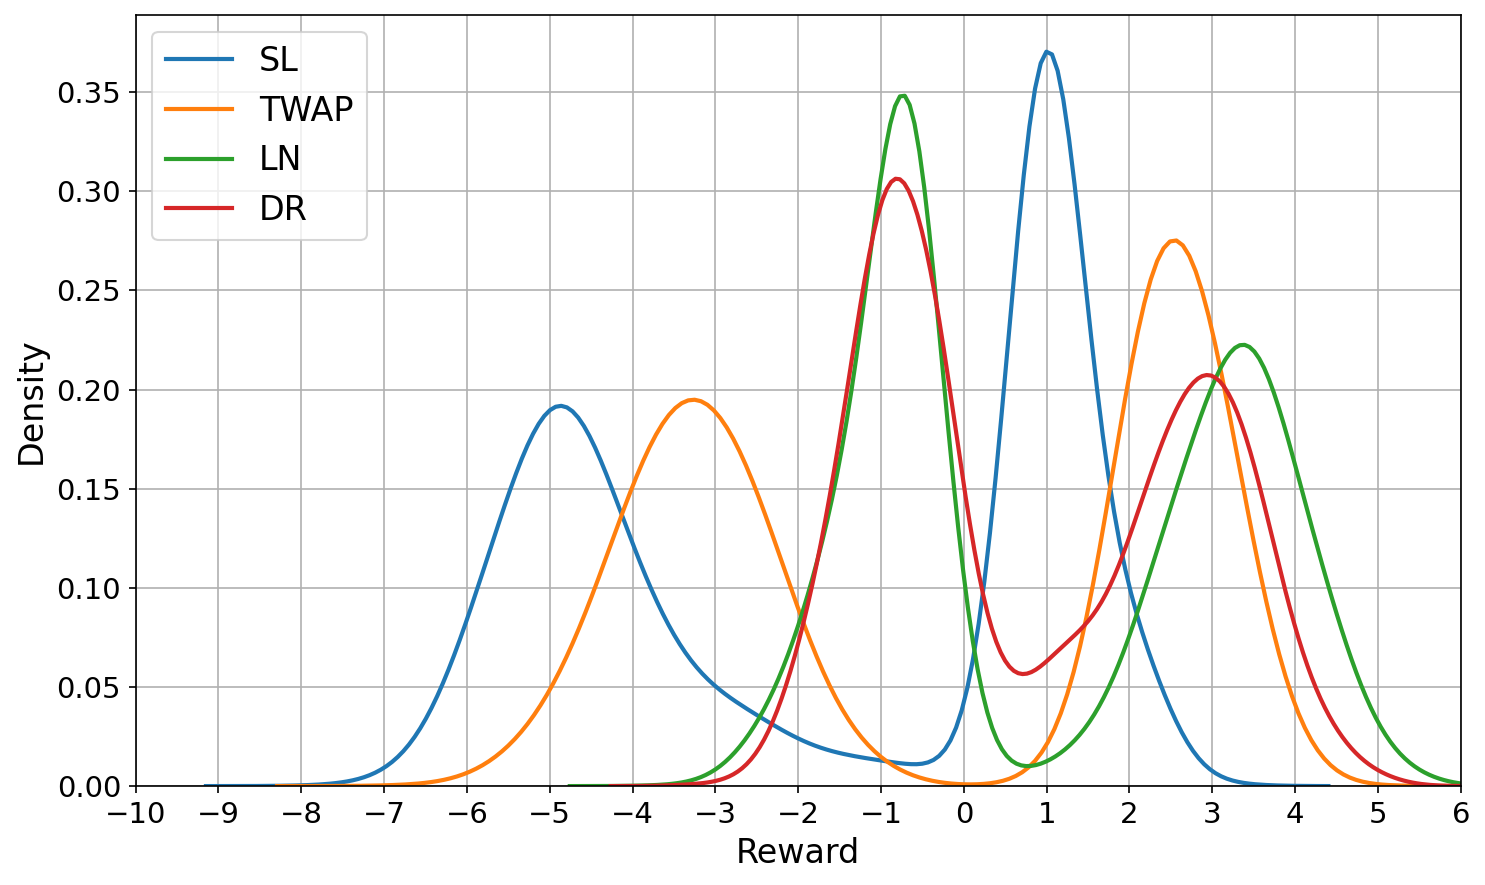

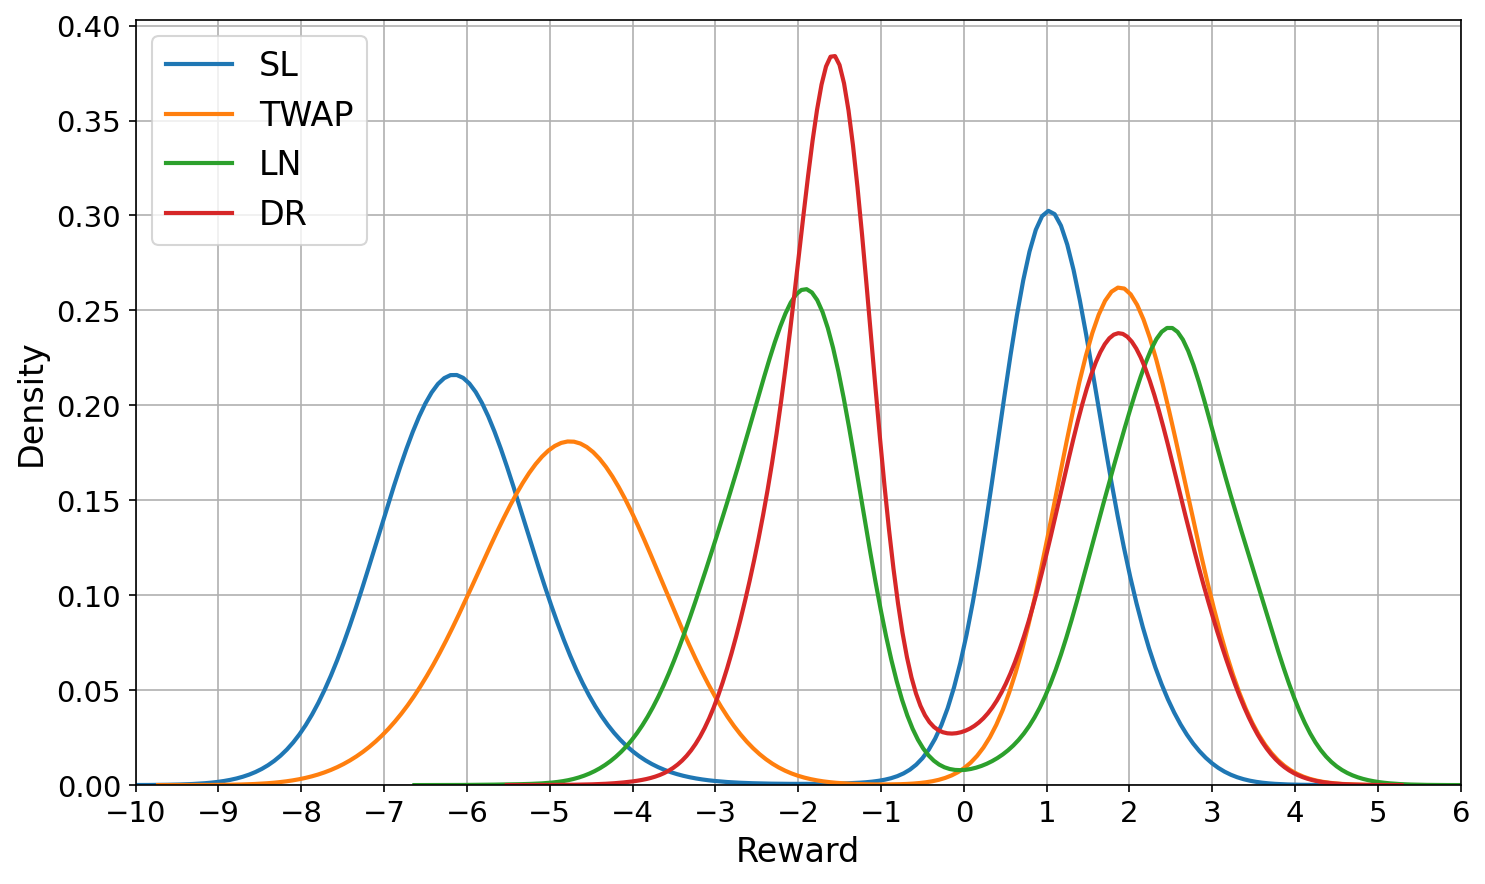

In [24]:
agent_names = ['sl_agent', 'linear_sl_agent', 'log_normal', 'dirichlet']
for env in ['noise', 'flow', 'strategic']:
    for lots in lots_list:
        fig, ax = plt.subplots(figsize=(10, 6))
        for agent in agent_names:
            # names = {'sl_agent': 'SL', 'linear_sl_agent': 'TWAP', 'actor_critic': 'RL'} 
            translate_names = {'sl_agent': 'SL', 'linear_sl_agent': 'TWAP', 'log_normal': 'LN', 'dirichlet': 'DR'}
            try: 
                sns.kdeplot(data[env][lots][agent], fill=False, label=translate_names[agent], bw_adjust=1, linewidth=2)
            except:
                print(f"no data available for {env}, {lots}, {agent}")
            # plt.tight_layout()
            # plt.savefig('plots/mid_price_drift.pdf')
            # ax.set_xticks(np.arange(-4, 4.5, 0.5))
            # ax.tick_params(axis='x', labelsize=7)
        ax.legend(prop={'size': 16}, loc='upper left')
        fig.set_dpi(150)
        # ax.set_title(f'{lots} lots, {env}', fontsize=18)
        ax.set_xlabel('Reward', fontsize=16)
        ax.set_ylabel('Density', fontsize=16)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        plt.grid()
        ax.set_xticks(np.arange(-10, 10, 1))
        if env == 'flow':
            plt.xlim(-6, 3)
        elif env == 'strategic':
            plt.xlim(-10, 6)
        else:
            plt.xlim(-6, 4)
        plt.tight_layout()
        plt.savefig(f'{parent_dir}/plots/reward_distribution_{env}_{lots_list}_with_dirichlet.pdf')

[20, 60]
no data available for noise, 20, actor_critic
no data available for noise, 60, actor_critic
no data available for flow, 20, actor_critic
no data available for flow, 60, actor_critic
no data available for strategic, 20, actor_critic
no data available for strategic, 60, actor_critic


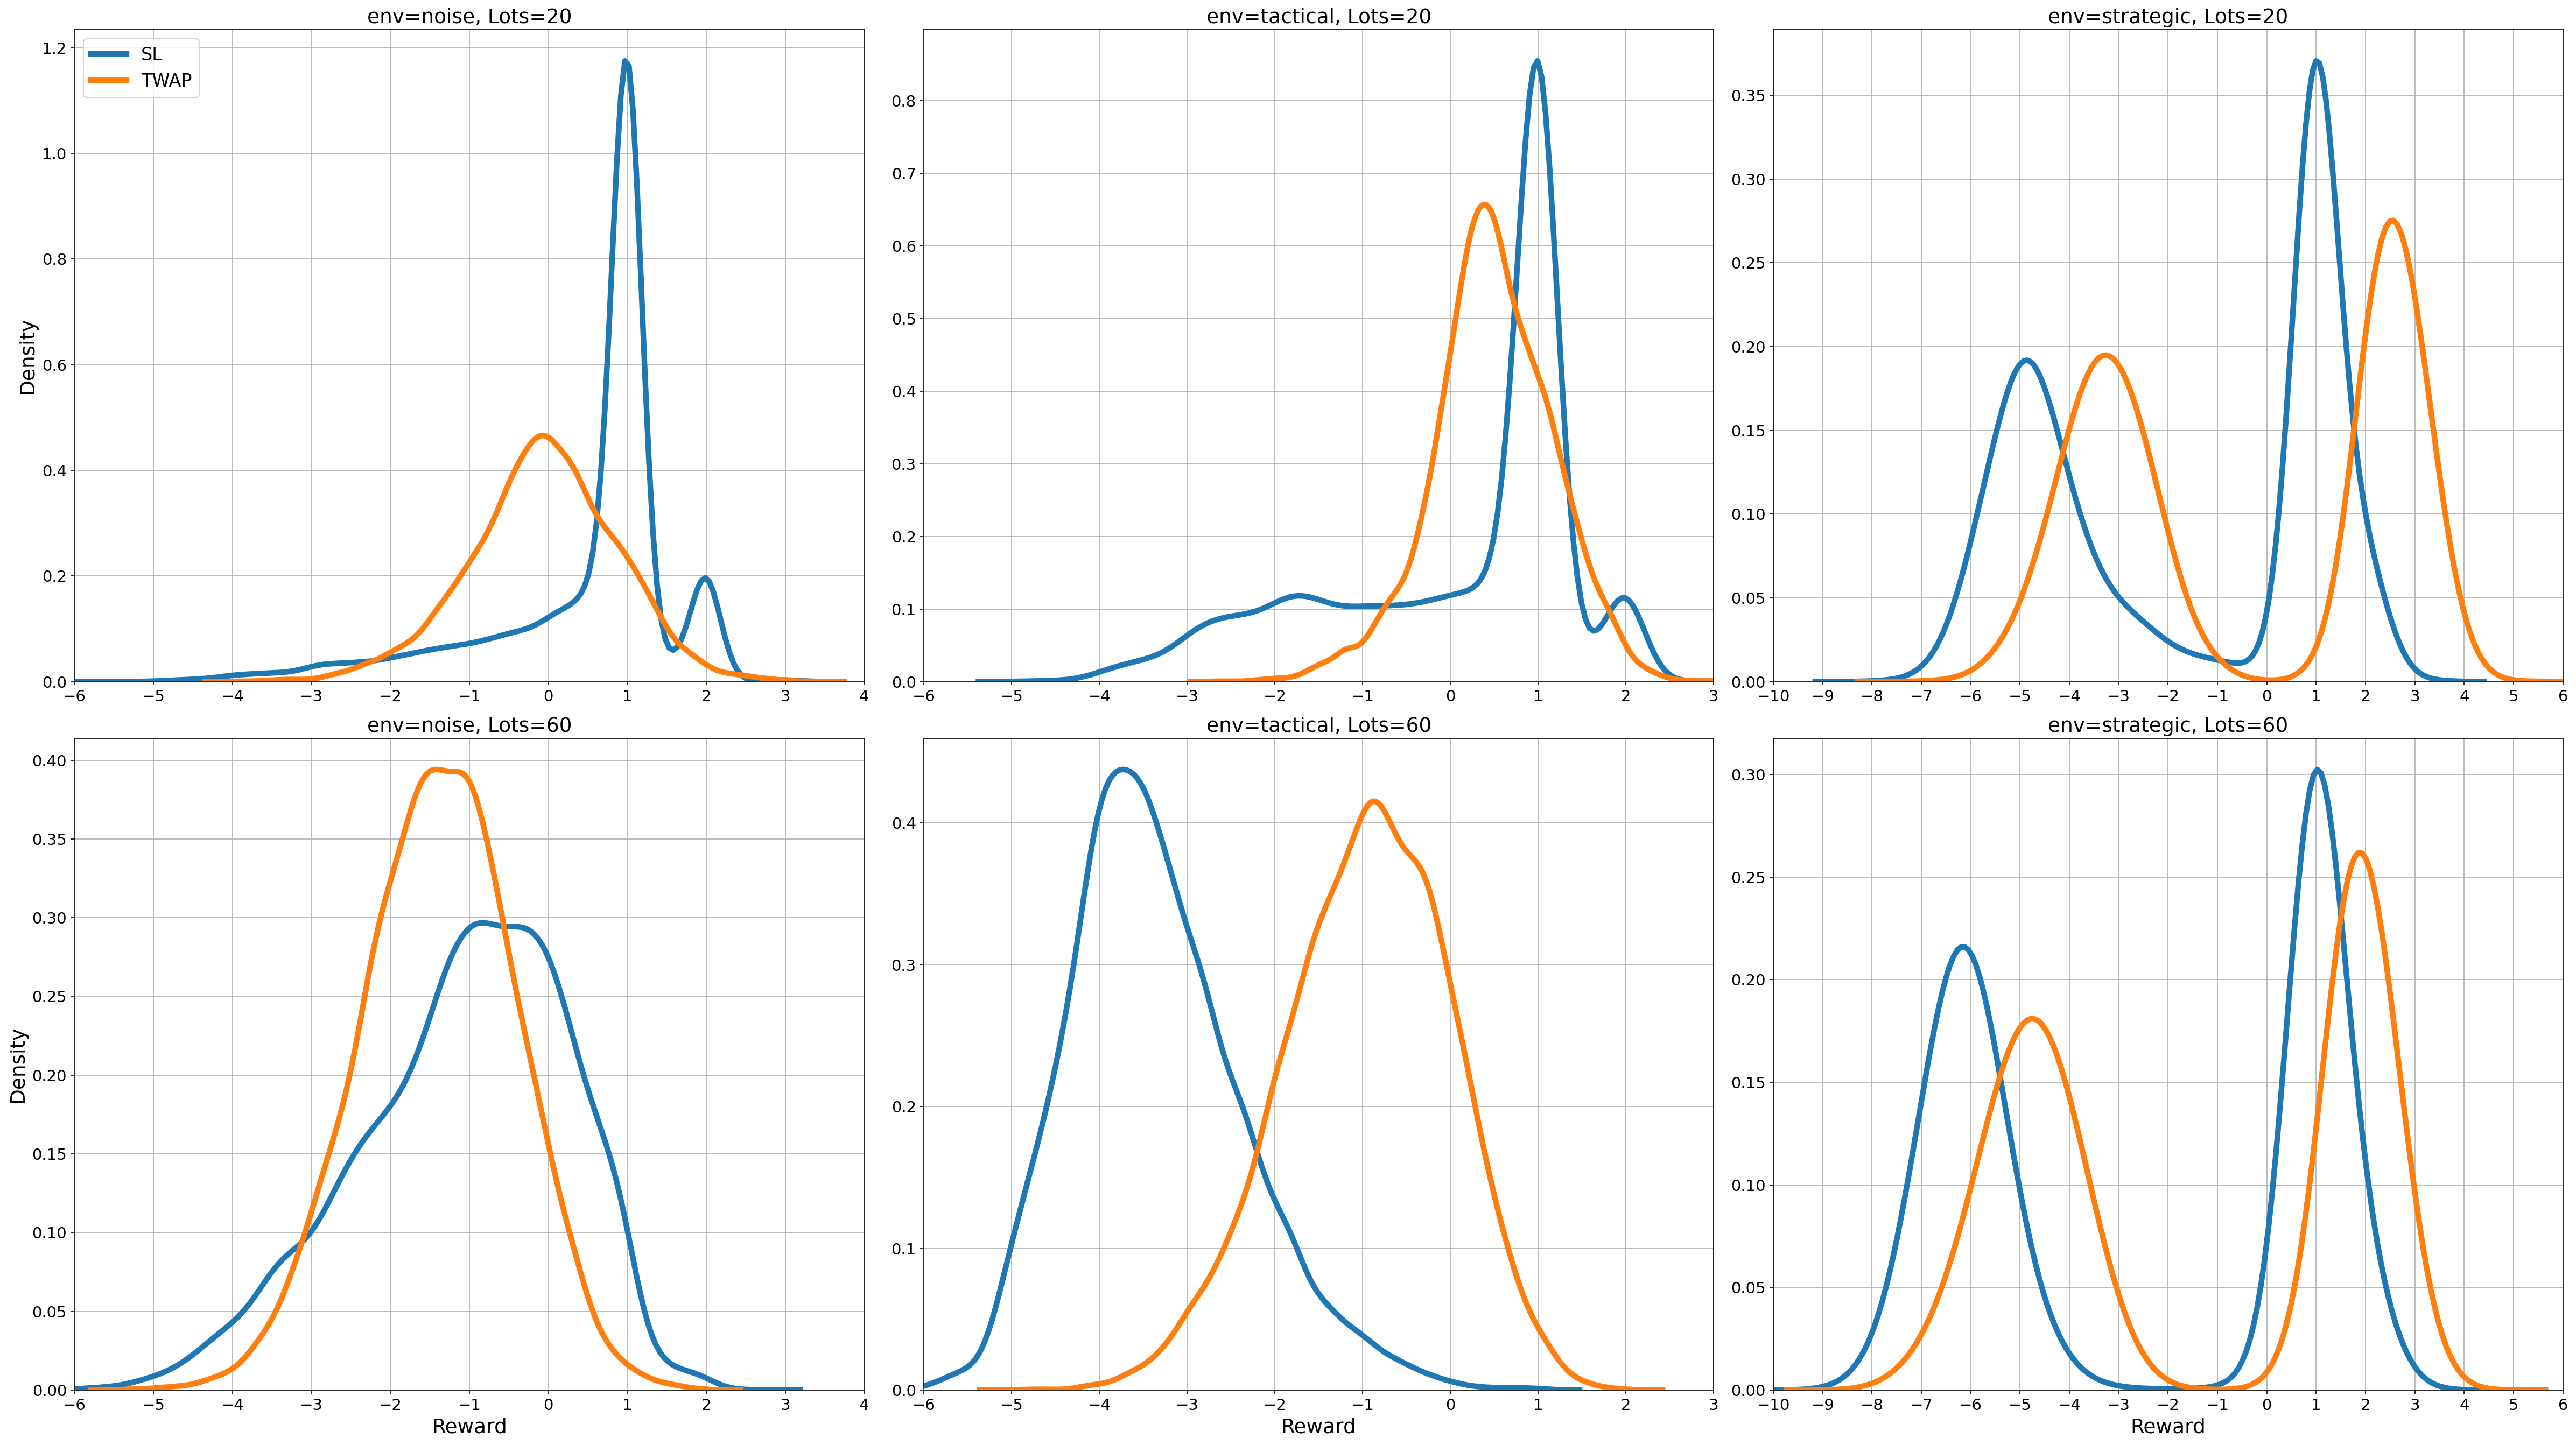

In [5]:
# lots = [20, 60]
# lots_list = [10, 50]
print(lots_list)
fig, axs = plt.subplots(2, 3, figsize=(2*16, 2*9), dpi=300)
for i, env in enumerate(['noise', 'flow', 'strategic']):
    for j, lots in enumerate(lots_list):
        ax = axs[j, i]
        for agent in ['sl_agent', 'linear_sl_agent', 'actor_critic']:
            names = {'sl_agent': 'SL', 'linear_sl_agent': 'TWAP', 'actor_critic': 'RL'} 
            try: 
                sns.kdeplot(data[env][lots][agent], fill=False, label=names[agent], bw_adjust=1, linewidth=5, ax=ax)
            except: 
                print(f"no data available for {env}, {lots}, {agent}")
        if env == 'noise' and lots == 20:
            ax.legend(prop={'size': 16}, loc='upper left')
        fig.set_dpi(150)
        if j == 1:
            ax.set_xlabel('Reward', fontsize=18)
        # ax.set_title(f'{env}', fontsize=18)
        if i == 0:
            ax.set_ylabel('Density', fontsize=18)
        else:
            ax.set_ylabel('')
        if i == 0:
            ax.set_title(f'Noise', fontsize=18)
        # if i == 0:
            # if j==1:
        if env == 'flow':
            ax.set_title(f'env=tactical, Lots={lots}', fontsize=18)
        else:
            ax.set_title(f'env={env}, Lots={lots}', fontsize=18)
        # if j == 0:
        # ax.set_title(f'#Lots={n_lots}', fontsize=18)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.grid()
        ax.set_xticks(np.arange(-10, 10, 1))
        if env == 'flow':
            ax.set_xlim(-6, 3)
        elif env == 'strategic':
            ax.set_xlim(-10, 6)
        else:
            ax.set_xlim(-6, 4)
plt.tight_layout()
plt.savefig(f'{parent_dir}/plots/reward_distribution_combined.pdf')

#############
generating plots for  noise
#############
generating plots for  flow
#############
generating plots for  strategic


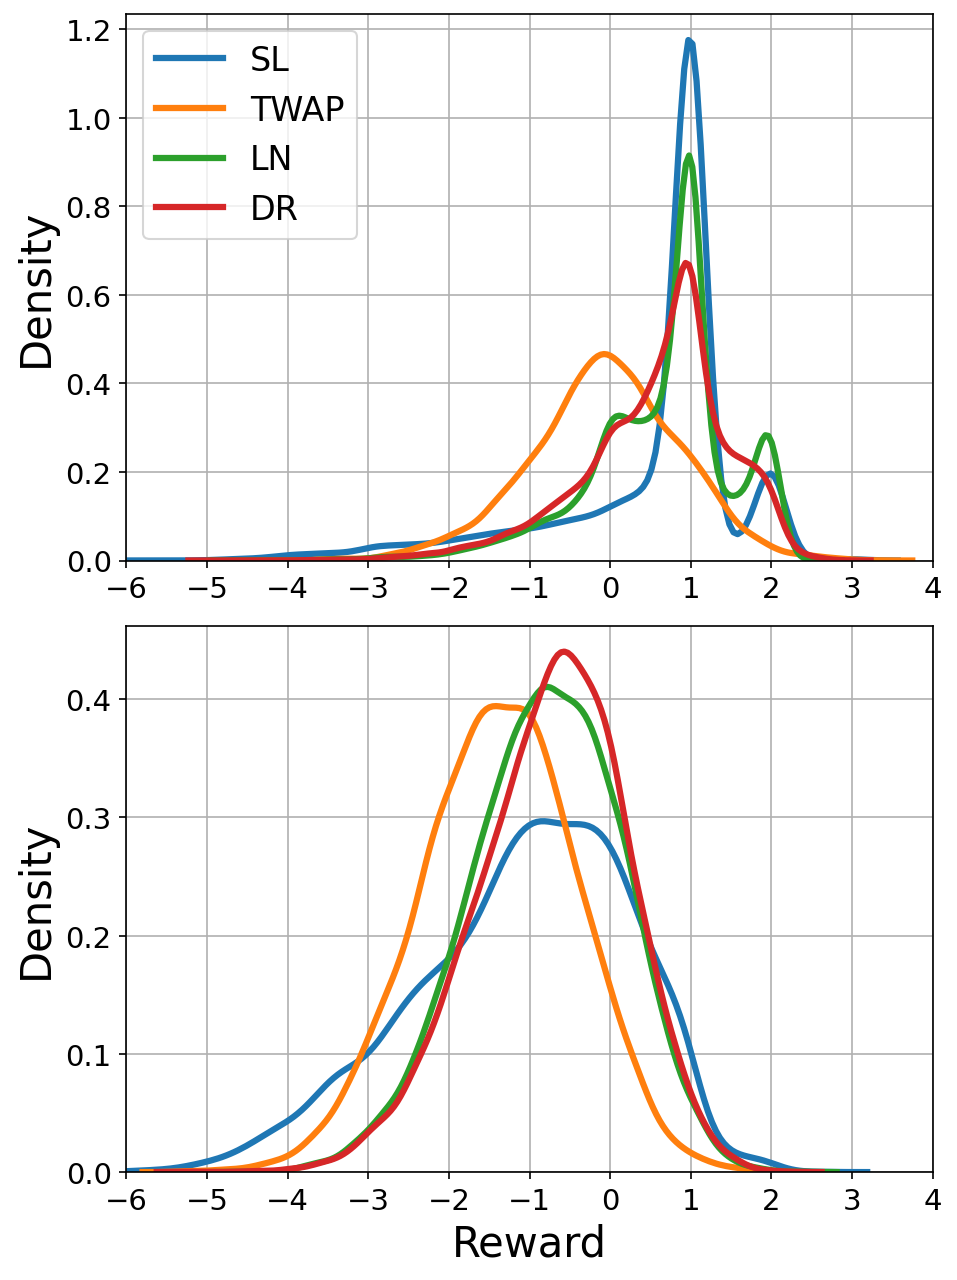

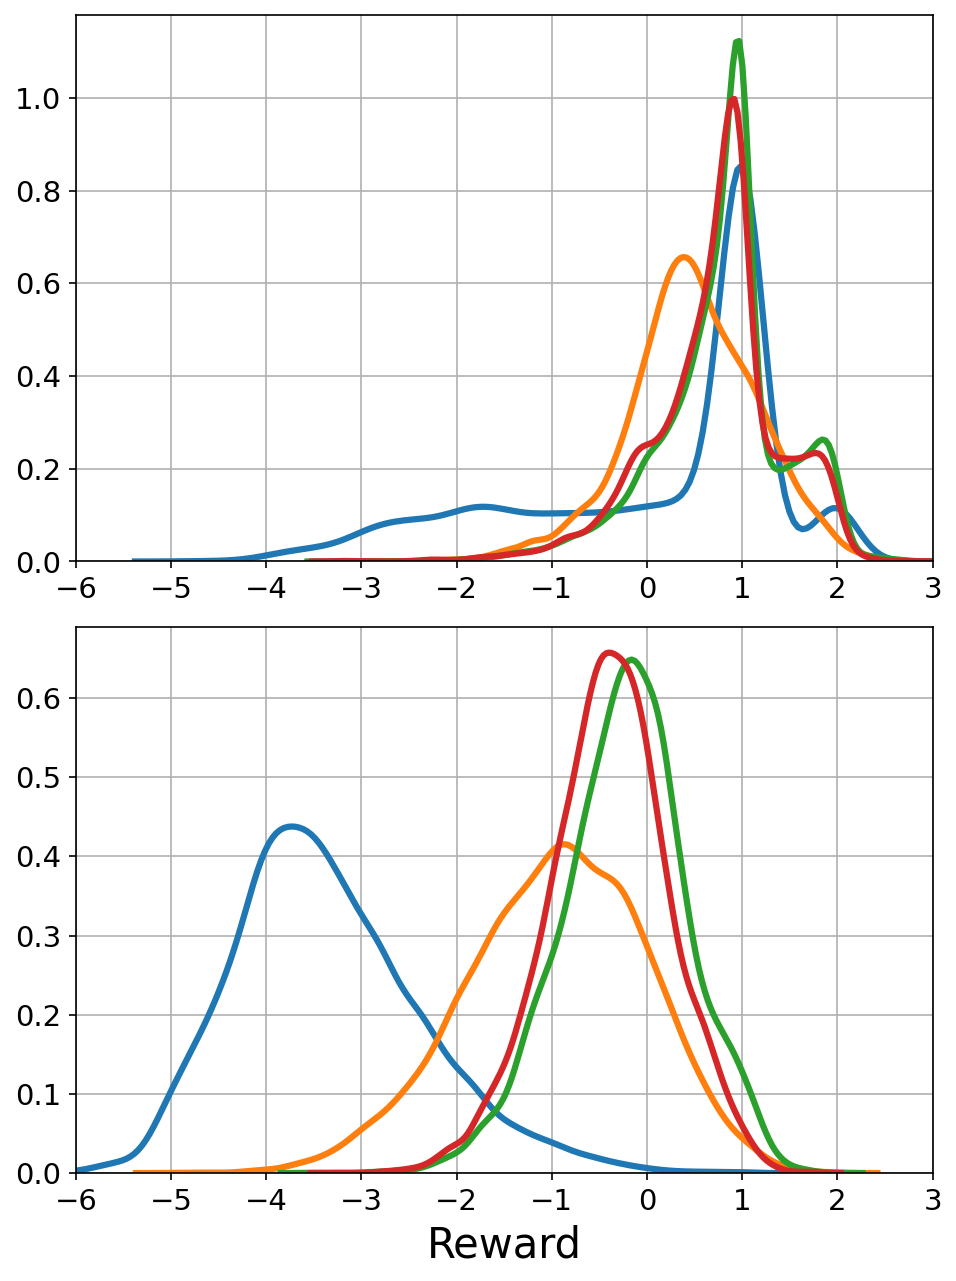

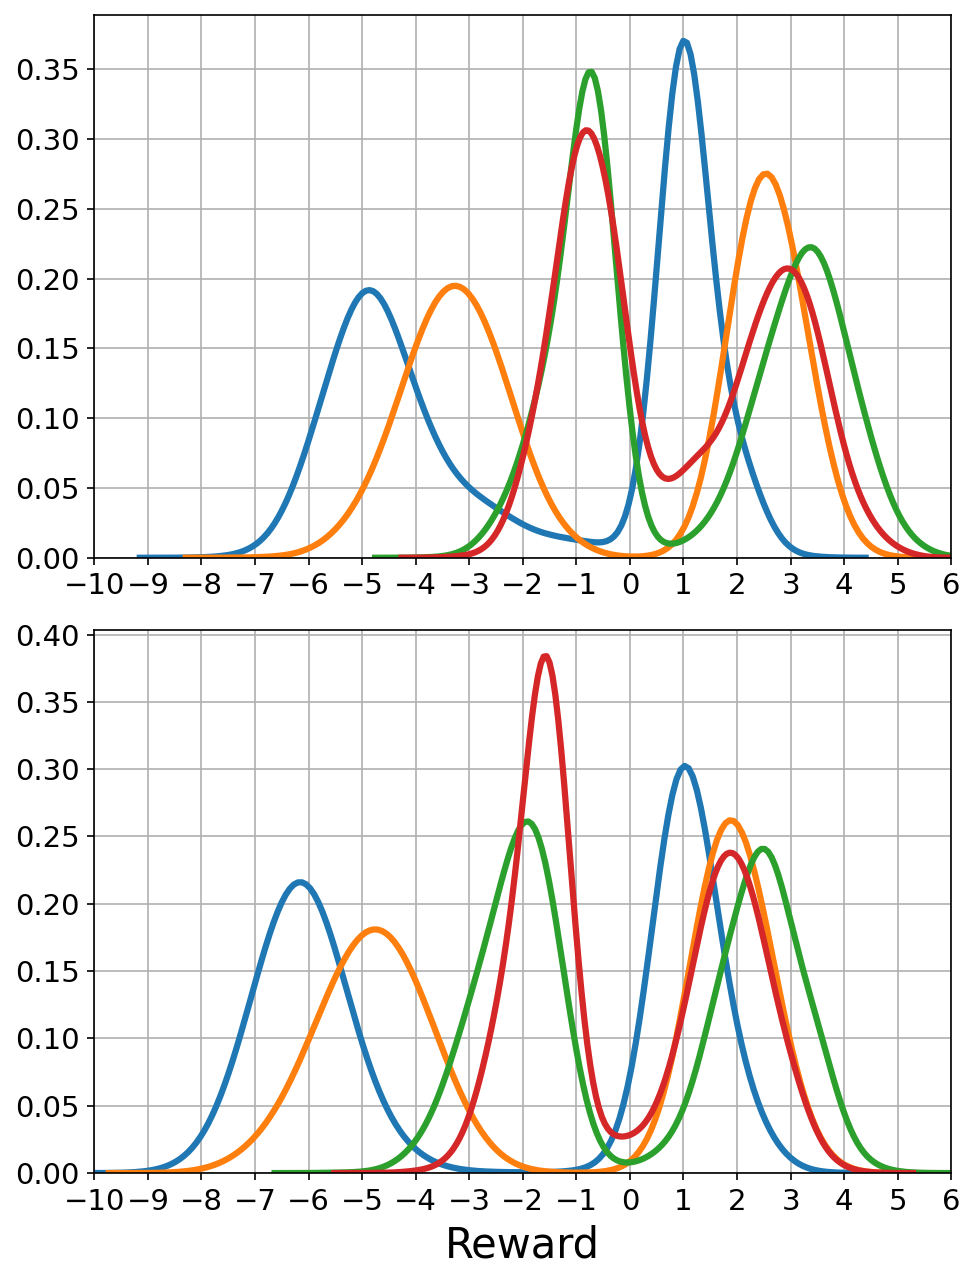

In [6]:

lots_list = [20, 60]
textwidth = 6.75
textheight = 9
scale = 3.2

agent_names = ['sl_agent', 'linear_sl_agent', 'log_normal', 'dirichlet']
for i, env in enumerate(['noise', 'flow', 'strategic']):
    print('#############')
    print('generating plots for ', env)
    fig, axs = plt.subplots(2, 1, figsize=(scale*0.3*textwidth, scale*0.3*textheight), dpi=300)
    for j, lots in enumerate(lots_list):
        ax = axs[j]
        for agent in agent_names:
            # names = {'sl_agent': 'SL', 'linear_sl_agent': 'TWAP', 'actor_critic': 'RL'} 
            name_translation = {'sl_agent': 'SL', 'linear_sl_agent': 'TWAP', 'log_normal': 'LN', 'dirichlet': 'DR'}
            try: 
                sns.kdeplot(data[env][lots][agent], fill=False, label=name_translation[agent], bw_adjust=1, linewidth=3, ax=ax)
            except: 
                print(f"no data available for {env}, {lots}, {agent}")
        if env == 'noise' and lots == 20:   
            ax.legend(prop={'size': 16}, loc='upper left')
        fig.set_dpi(150)
        if j == 1:
            ax.set_xlabel('Reward', fontsize=20)
        # ax.set_title(f'{env}', fontsize=18)
        if i == 0:
            ax.set_ylabel('Density', fontsize=20)
        else:
            ax.set_ylabel('')
        # if i == 0:
            # ax.set_title(f'Noise', fontsize=18)
        # if j == 0:
        # ax.set_title(f'#Lots={n_lots}', fontsize=18)
        tick_size = 14
        ax.tick_params(axis='x', labelsize=tick_size)
        ax.tick_params(axis='y', labelsize=tick_size)
        ax.grid()
        ax.set_xticks(np.arange(-10, 10, 1))
        if env == 'flow':
            ax.set_xlim(-6, 3)
        elif env == 'strategic':
            ax.set_xlim(-10, 6)
        else:
            ax.set_xlim(-6, 4)
    plt.tight_layout()
    plt.savefig(f'{parent_dir}/plots/reward_distribution_{env}_with_dirichlet.pdf')

In [12]:
data['noise'][5]['sl_agent']

array([ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
       -2.6,  1. ,  1. ,  1. ,  0.2,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. , -2.2,  1. ,  1. , -3. ,
        1. ])

<Axes: ylabel='Density'>

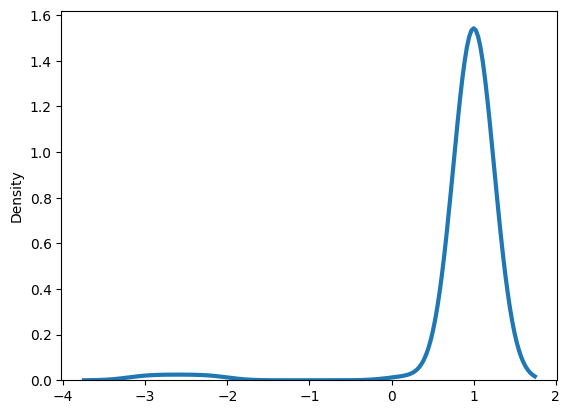

In [13]:
sns.kdeplot(data['noise'][5]['sl_agent'], fill=False, label=names[agent], bw_adjust=1, linewidth=3)

In [57]:
folder_path = f"{parent_dir}/latex_tables"
# n_lots = [20, 60]
for env in ['noise', 'flow', 'strategic']:
    if env == 'flow':
        print('tactical:')
    else:
        print(f'{env}: ')
    data_for_df = {}
    name_dict = {'sl_agent': 'SL', 'linear_sl_agent': 'TWAP', 'actor_critic': 'RL'}
    # for agent in ['sl_agent', 'linear_sl_agent', 'actor_critic']:
    for agent in ['sl_agent', 'linear_sl_agent']:
        name = name_dict[agent]
        data_for_df[f'E[{name}]'] = []
        data_for_df[f'Std[{name}]'] = []
        for lots in lots_list:
            try:
                data_for_df[f'Std[{name}]'] += [np.std(data[env][lots][agent])]
                data_for_df[f'E[{name}]'] += [np.mean(data[env][lots][agent])]                
            except:
                print(f"no data available for {env}, {lots}, {agent}")
                data_for_df[f'Std[{name}]'] += [np.nan]
                data_for_df[f'E[{name}]'] += [np.nan]
                # print(data[env][lots][agent])
    # print(data_for_df)
    df = pd.DataFrame.from_dict(data_for_df).round(2)    
    df.index.name = 'Lots'
    df.index = lots_list
    display(df)
    df = df.round(2)
    latex_table = df.to_latex(float_format="%.2f")
    with open(f"{folder_path}/results_table_{env}.tex", "w") as f:
        f.write(latex_table)
    print()

noise: 


,E[SL],Std[SL],E[TWAP],Std[TWAP]
10,0.76,0.79,0.18,0.90
60,-1.05,1.27,-1.40,0.95



tactical:


,E[SL],Std[SL],E[TWAP],Std[TWAP]
10,0.81,0.72,0.64,0.64
60,-3.28,1.08,-0.93,0.95



strategic: 


,E[SL],Std[SL],E[TWAP],Std[TWAP]
10,-1.00,2.55,-0.01,2.89
60,-2.51,3.58,-1.38,3.41
